### Imports

In [1]:
import xtrack as xt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

### Prepare colliders
With and without IR3/7 beta optimization and phase optimization 

In [2]:
collider = xt.Multiline.from_json('collider.json')
collider_optphases = xt.Multiline.from_json('collider_optphases.json')

Init: interval 439, total 43814
Loading line from dict: 100% (43814/43814 iterations)
Done loading line from dict.           
Init: interval 439, total 43862
Loading line from dict: 100% (43862/43862 iterations)
Done loading line from dict.           
Init: interval 432, total 43150
Loading line from dict: 100% (43150/43150 iterations)
Done loading line from dict.           
Init: interval 432, total 43198
Loading line from dict: 100% (43198/43198 iterations)
Done loading line from dict.           
Init: interval 432, total 43150
Loading line from dict: 100% (43150/43150 iterations)
Done loading line from dict.           
Init: interval 432, total 43198
Loading line from dict: 100% (43198/43198 iterations)
Done loading line from dict.           
Init: interval 432, total 43150
Loading line from dict: 100% (43150/43150 iterations)
Done loading line from dict.           
Init: interval 432, total 43198
Loading line from dict: 100% (43198/43198 iterations)
Done loading line from dict.    

In [3]:
collider.build_trackers()
collider_optphases.build_trackers()

Compiling ContextCpu kernels...


00ffedde1b624c44bdd3ce0a262c1c1a.c:5362:11: warning: '_GNU_SOURCE' macro redefined [-Wmacro-redefined]
#  define _GNU_SOURCE // enable GNU libc NAN extension if possible
          ^
/Users/macbe16879/.pyenv/versions/3.11.7/include/python3.11/pyconfig.h:1696:10: note: previous definition is here
# define _GNU_SOURCE 1
         ^
00ffedde1b624c44bdd3ce0a262c1c1a.c:17846:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
00ffedde1b624c44bdd3ce0a262c1c1a.c:18114:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
00ffedde1b624c44bdd3ce0a262c1c1a.c:18203:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
00ffedde1b624c44bdd3ce0a262c1c1a.c:18206:12

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


91d23d4bb1a347a28532605e9ea0cda2.c:5362:11: warning: '_GNU_SOURCE' macro redefined [-Wmacro-redefined]
#  define _GNU_SOURCE // enable GNU libc NAN extension if possible
          ^
/Users/macbe16879/.pyenv/versions/3.11.7/include/python3.11/pyconfig.h:1696:10: note: previous definition is here
# define _GNU_SOURCE 1
         ^
91d23d4bb1a347a28532605e9ea0cda2.c:17846:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
91d23d4bb1a347a28532605e9ea0cda2.c:18114:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
91d23d4bb1a347a28532605e9ea0cda2.c:18203:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
91d23d4bb1a347a28532605e9ea0cda2.c:18206:12

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/macbe16879/.pyenv/versions/3.11.7/lib' ignored


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/macbe16879/.pyenv/versions/3.11.7/lib' ignored


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/macbe16879/.pyenv/versions/3.11.7/lib' ignored


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/macbe16879/.pyenv/versions/3.11.7/lib' ignored


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/macbe16879/.pyenv/versions/3.11.7/lib' ignored


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/macbe16879/.pyenv/versions/3.11.7/lib' ignored


Done compiling ContextCpu kernels.


### Plot evolution of beta in IR 3

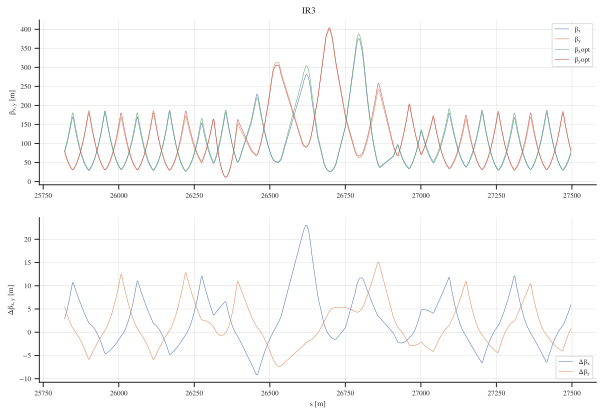

In [4]:
line = collider.lhcb1
line_optphases = collider_optphases.lhcb1
tw = line.twiss()
tw_optphases = line_optphases.twiss()
twmb19r5 = tw.get_twiss_init(at_element='mb.b19l3.b1')
twmb19r5_optphases = tw_optphases.get_twiss_init(at_element='mb.b19l3.b1')
tw_part = line.twiss(ele_start='mb.b19l3.b1', ele_stop='mb.b19r3.b1',
                        twiss_init=twmb19r5)
tw_part_optphases = line_optphases.twiss(ele_start='mb.b19l3.b1', ele_stop='mb.b19r3.b1',
                        twiss_init=twmb19r5_optphases)

fig = plt.figure(1, figsize=(10, 6))
spbet = plt.subplot(2,1,1)
spco = plt.subplot(2,1,2, sharex=spbet)

spbet.plot(tw_part['s'], tw_part['betx'], label=r'$ \beta_x$')
spbet.plot(tw_part['s'], tw_part['bety'], label=r'$ \beta_y$')
spbet.plot(tw_part_optphases['s'], tw_part_optphases['betx'], label=r'$\beta_x opt$')
spbet.plot(tw_part_optphases['s'], tw_part_optphases['bety'], label=r'$\beta_y opt$')

spco.plot(tw_part['s'], tw_part_optphases['betx'] - tw_part['betx'] , label=r'$\Delta \beta_x$')
spco.plot(tw_part['s'], tw_part_optphases['bety'] - tw_part['bety'] , label=r'$\Delta \beta_y$')



spbet.set_ylabel(r'$\beta_{x,y}$ [m]')
spco.set_ylabel(r'$\Delta \beta_{x,y}$ [m]')
spco.set_xlabel(r'$s$ [m]')

spbet.legend(loc='upper right')
spco.legend(loc='lower right')

spbet.grid()
spco.grid()

fig.suptitle('IR3')
fig.subplots_adjust(top=0.95)
plt.legend(loc='lower right')  # Add this line to make the legend bottom right
plt.savefig('beta_opt_IR3.pdf')
plt.show()


### Plot evolution of beta in IR 7

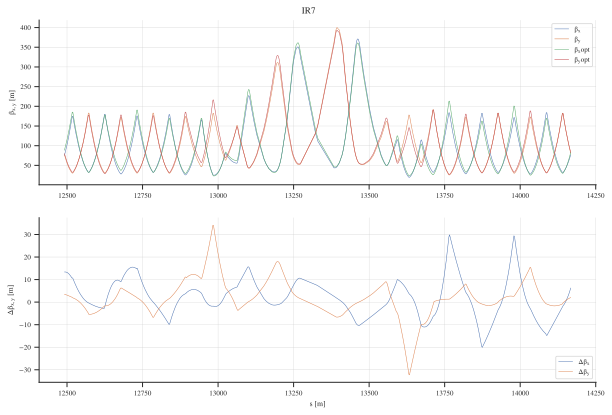

In [5]:
twmb19r5 = tw.get_twiss_init(at_element='mb.b19l7.b1')
twmb19r5_optphases = tw_optphases.get_twiss_init(at_element='mb.b19l7.b1')
tw_part = line.twiss(ele_start='mb.b19l7.b1', ele_stop='mb.b19r7.b1',
                        twiss_init=twmb19r5)
tw_part_optphases = line_optphases.twiss(ele_start='mb.b19l7.b1', ele_stop='mb.b19r7.b1',
                        twiss_init=twmb19r5_optphases)

fig = plt.figure(1, figsize=(10, 6))
spbet = plt.subplot(2,1,1)
spco = plt.subplot(2,1,2, sharex=spbet)

spbet.plot(tw_part['s'], tw_part['betx'], label=r'$ \beta_x$')
spbet.plot(tw_part['s'], tw_part['bety'], label=r'$ \beta_y$')
spbet.plot(tw_part_optphases['s'], tw_part_optphases['betx'], label=r'$\beta_x opt$')
spbet.plot(tw_part_optphases['s'], tw_part_optphases['bety'], label=r'$\beta_y opt$')

spco.plot(tw_part['s'], tw_part_optphases['betx'] - tw_part['betx'] , label=r'$\Delta \beta_x$')
spco.plot(tw_part['s'], tw_part_optphases['bety'] - tw_part['bety'] , label=r'$\Delta \beta_y$')



spbet.set_ylabel(r'$\beta_{x,y}$ [m]')
spco.set_ylabel(r'$\Delta \beta_{x,y}$ [m]')
spco.set_xlabel(r'$s$ [m]')

spbet.legend(loc='upper right')
spco.legend(loc='lower right')

spbet.grid()
spco.grid()

fig.suptitle('IR7')
fig.subplots_adjust(top=0.95)
plt.legend(loc='lower right')  # Add this line to make the legend bottom right
plt.savefig('beta_opt_IR7.pdf')
plt.show()

### Compute evolution of machine phasing

In [6]:
# Convert both twisses to dataframes 
df = tw.to_pandas()
df_opt = tw_optphases.to_pandas()

In [7]:
# Only keep elements whose name is in both dataframes
df = df[df['name'].isin(df_opt['name'])]
df_opt = df_opt[df_opt['name'].isin(df['name'])]

In [8]:
# Reindex both dataframes to have the same index
df = df.set_index(df_opt.index)

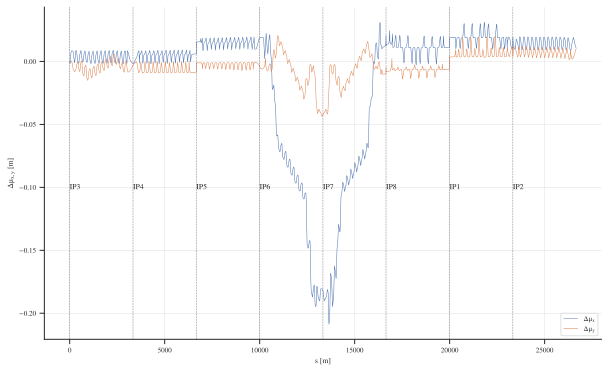

In [9]:
plt.close()
fig = plt.figure(1, figsize=(10, 6))

plt.plot(df['s'], df_opt['mux'] - df['mux'] , label=r'$\Delta \mu_x$')
plt.plot(df['s'], df_opt['muy'] - df['muy'] , label=r'$\Delta \mu_y$')
for ip in range(1,9):
    plt.axvline(df['s'][df['name']=='ip'+str(ip)].values[0], color='black', linestyle='--', alpha=0.5)
    # add text next to the vertical line, in the middle of the plot
    plt.text(df['s'][df['name']=='ip'+str(ip)].values[0], -0.1, 'IP'+str(ip), rotation=0, va='center')
plt.ylabel(r'$\Delta \mu_{x,y}$ [m]')
plt.xlabel(r'$s$ [m]')

plt.grid()
plt.legend(loc='lower right')
#fig.suptitle('IR7')
#fig.subplots_adjust(top=0.95)
plt.savefig('phase_evolution.pdf')
plt.show()

In [25]:
(360*((tw_optphases['mux', 'tctpxh.4l1.b1'] - tw_optphases['mux','mkd.o5l6.b1'])%1))

181.55410779727873

In [26]:
360*((tw_optphases['muy', 'tctpxv.4l1.b1'] - tw_optphases['muy','mkd.o5l6.b1'])%1)

281.12787405253954